## Pooling in CNN

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Define the input RGB image (18x18x3)
# Randomly generating values for illustration
I_rgb = np.random.randint(0, 256, size=(18, 18, 3), dtype=np.uint8)
print(I_rgb)

[[[246  31 147]
  [220  70 245]
  [244  98 183]
  [118 200 237]
  [112  33 146]
  [ 99 170 194]
  [171   9 127]
  [131 141 156]
  [ 77 116  82]
  [222 147 210]
  [102  71 170]
  [159   5 248]
  [249  69 171]
  [234 144 125]
  [216  43  75]
  [178 207 251]
  [184 174 172]
  [ 88 156   4]]

 [[238 149  59]
  [232 205 170]
  [ 39 128 151]
  [136 160 200]
  [181 247 224]
  [254 112 131]
  [233 173  60]
  [252  92  69]
  [ 29 118 210]
  [183 107  69]
  [233   9  43]
  [170 184 196]
  [ 43  47  73]
  [158   6 176]
  [194 207 175]
  [ 41 153 231]
  [  1  85 126]
  [ 17 147 133]]

 [[162 179 135]
  [ 97 209 234]
  [  5 249 194]
  [221 165 199]
  [  7 111 213]
  [149  80 135]
  [ 17 253 250]
  [212  45 234]
  [ 88 162  94]
  [ 26 112 117]
  [ 67   5  69]
  [ 63 127   3]
  [147 250 146]
  [ 38 193  41]
  [229  63 221]
  [ 67  79  36]
  [199 189 123]
  [133 156  66]]

 [[242 187 194]
  [163 246 130]
  [ 45  29 114]
  [104  56 178]
  [254  47  31]
  [253  91 221]
  [105  51  24]
  [214  17  58]
  

### MAX POOLING

In [13]:
# Function to perform max pooling for RGB images
def max_pooling_rgb(image, pool_size=2, stride=2):
    image_height, image_width, num_channels = image.shape
    output_height = (image_height - pool_size) // stride + 1
    output_width = (image_width - pool_size) // stride + 1
    
    output = np.zeros((output_height, output_width, num_channels), dtype=np.uint8)
    
    for c in range(num_channels):  # Iterate over each channel (R, G, B)
        for i in range(0, image_height - pool_size + 1, stride):
            for j in range(0, image_width - pool_size + 1, stride):
                roi = image[i:i+pool_size, j:j+pool_size, c]
                output[i // stride, j // stride, c] = np.max(roi)
    
    return output

In [14]:
# Perform max pooling with 2x2 window and stride 2 for RGB image
output_rgb_pooled = max_pooling_rgb(I_rgb, pool_size=2, stride=2)
print(output_rgb_pooled)

[[[246 205 245]
  [244 200 237]
  [254 247 224]
  [252 173 156]
  [222 147 210]
  [233 184 248]
  [249 144 176]
  [216 207 251]
  [184 174 172]]

 [[242 246 234]
  [221 249 199]
  [254 111 221]
  [214 253 250]
  [ 88 162 242]
  [127 219 230]
  [147 250 216]
  [229 220 221]
  [199 189 187]]

 [[242 176 205]
  [243 145 210]
  [240 182 190]
  [149 250 160]
  [209 218 243]
  [122 180 215]
  [247 249 203]
  [136 160 210]
  [230 243 173]]

 [[252 251 186]
  [251 172 216]
  [ 92 201 183]
  [208 201 230]
  [197 239 204]
  [222 245 179]
  [160 209 126]
  [239 194 204]
  [212 230 246]]

 [[178 149 220]
  [175 250 211]
  [218 161 254]
  [249 225 233]
  [169 154 218]
  [242 191 239]
  [116  47 254]
  [225 233 220]
  [231 239 185]]

 [[181 242 238]
  [218 229 194]
  [212 235 247]
  [235 185 242]
  [240 149 231]
  [235 251 129]
  [244 194 236]
  [254 209 165]
  [255 252 254]]

 [[246  49 186]
  [159 227 250]
  [205 237 224]
  [199 193 234]
  [166 184 134]
  [255 187 220]
  [196 112 238]
  [155 137 2

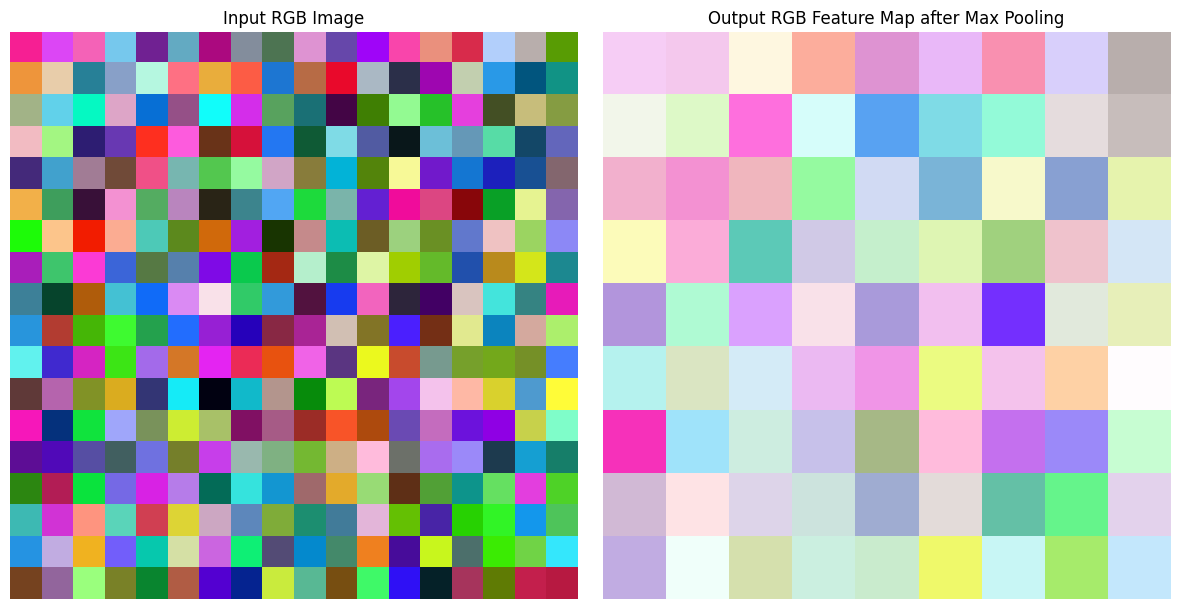

In [15]:


# Plotting the images
plt.figure(figsize=(12, 6))

# Plot Input RGB Image
plt.subplot(1, 2, 1)
plt.imshow(I_rgb)
plt.title('Input RGB Image')
plt.axis('off')

# Plot Output RGB Feature Map after Max Pooling
plt.subplot(1, 2, 2)
plt.imshow(output_rgb_pooled)
plt.title('Output RGB Feature Map after Max Pooling')
plt.axis('off')

plt.tight_layout()
plt.show()

### AVERAGE POOLING

In [16]:
def average_pooling_rgb(image, pool_size=2, stride=2):
    image_height, image_width, num_channels = image.shape
    output_height = (image_height - pool_size) // stride + 1
    output_width = (image_width - pool_size) // stride + 1
    
    output = np.zeros((output_height, output_width, num_channels), dtype=np.uint8)
    
    for c in range(num_channels):  # Iterate over each channel (R, G, B)
        for i in range(0, image_height - pool_size + 1, stride):
            for j in range(0, image_width - pool_size + 1, stride):
                roi = image[i:i+pool_size, j:j+pool_size, c]
                output[i // stride, j // stride, c] = int(np.mean(roi))
    
    return output

In [17]:
# Perform average pooling with 2x2 window and stride 2 for RGB image
output_rgb_pooled = average_pooling_rgb(I_rgb, pool_size=2, stride=2)
print(output_rgb_pooled)

[[[234 113 155]
  [134 146 192]
  [161 140 173]
  [196 103 103]
  [127 122 142]
  [166  67 164]
  [171  66 136]
  [157 152 183]
  [ 72 140 108]]

 [[166 205 173]
  [ 93 124 171]
  [165  82 150]
  [137  91 141]
  [ 41 120 126]
  [ 84 110 116]
  [ 75 164 107]
  [121 128 151]
  [112 129 119]]

 [[109 134 123]
  [143  89 117]
  [157 141 149]
  [ 83 154 100]
  [113 168 140]
  [ 76 130 151]
  [205  89 159]
  [ 48  79 111]
  [129 131 143]]

 [[128 168 110]
  [200  89 143]
  [ 85 146 113]
  [126  86 135]
  [141 117  90]
  [ 92 166 112]
  [130 186  51]
  [138 133 149]
  [133 178 128]]

 [[ 71 101 116]
  [ 93 179  69]
  [ 76 128 205]
  [121 115 183]
  [109  62 124]
  [151 116 161]
  [ 75  28 108]
  [130 197 186]
  [167 141 145]]

 [[109 110 168]
  [155 145  71]
  [111 128 159]
  [120  66 136]
  [164 117  99]
  [158 147  91]
  [181 123 165]
  [176 180  70]
  [129 168 139]]

 [[106  23 160]
  [ 81 141 142]
  [138 155 101]
  [162 113 152]
  [141 124  88]
  [220 130 101]
  [144 100 178]
  [108  53 1

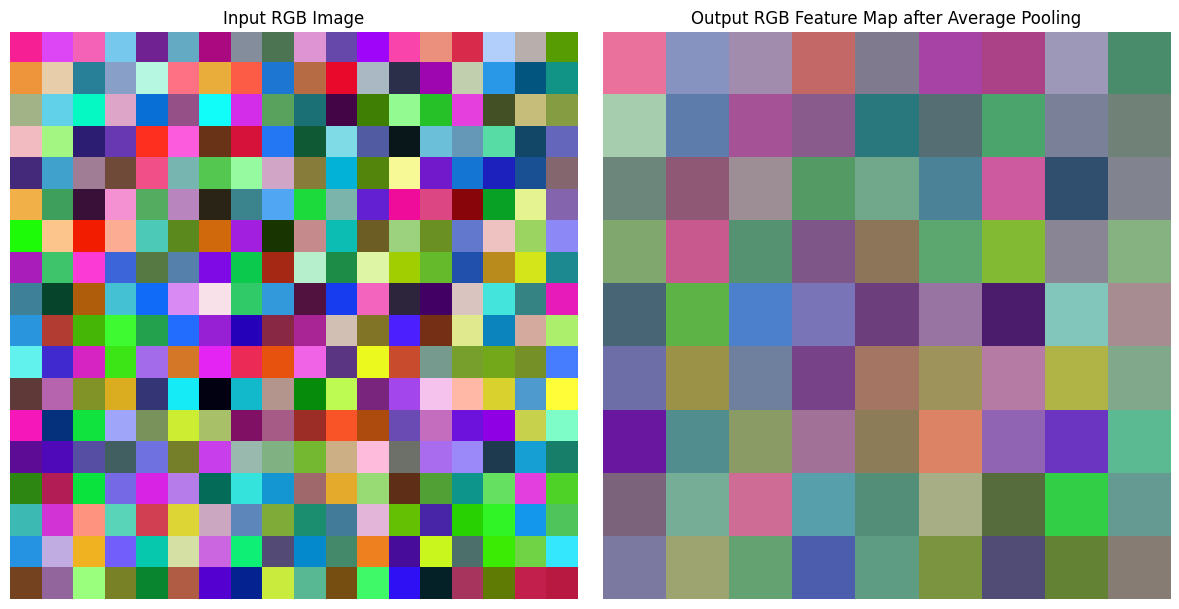

In [18]:

# Plotting the images
plt.figure(figsize=(12, 6))

# Plot Input RGB Image
plt.subplot(1, 2, 1)
plt.imshow(I_rgb)
plt.title('Input RGB Image')
plt.axis('off')

# Plot Output RGB Feature Map after Average Pooling
plt.subplot(1, 2, 2)
plt.imshow(output_rgb_pooled)
plt.title('Output RGB Feature Map after Average Pooling')
plt.axis('off')

plt.tight_layout()
plt.show()